In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major versio

In [10]:
import os
import pandas as pd

csv_path = r"C:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\cleaned_aapl_data.csv"

# Debug: Current directory and file list
print("📂 Current Working Directory:", os.getcwd())
print("📄 Files in Directory:", os.listdir())

# Load CSV
df = pd.read_csv(csv_path)
print("🧾 CSV Columns:", df.columns)

# Convert and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filter for Adjusted Close
data = df.filter(['Adj Close'])  # Or 'Adj. Close' if that's the actual column name
dataset = data.values

print("✅ Dataset loaded successfully!")


📂 Current Working Directory: c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting
📄 Files in Directory: ['.git', '.venv', '.venv310', 'app', 'cleaned_aapl_data.csv', 'data', 'README.md', 'Report.docx', 'requirements.txt', 'sarima.ipynb', 'sarima_forecast.csv', 'Step1_EDA_Load_Data.ipynb', 'Step2_Check_Stationarity.ipynb', 'Step3_ARIMA_Model.ipynb', 'Step4_Prophet_Model.ipynb', 'Step5_LSTM_Model.ipynb', 'Step6_Model_Comparison.ipynb', 'stock_forecast_app.py', '__pycache__', '📘 Title.docx']
🧾 CSV Columns: Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
✅ Dataset loaded successfully!


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
csv_path = r"C:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\cleaned_aapl_data.csv"
df = pd.read_csv(csv_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check columns
print("📋 Columns in your dataset:", df.columns)

# Filter correct column
if 'Adj Close' in df.columns:
    data = df.filter(['Adj Close'])
elif 'Close' in df.columns:
    data = df.filter(['Close'])
else:
    raise ValueError("❌ Neither 'Adj Close' nor 'Close' found in dataset!")

# Convert to numpy array
dataset = data.values
print("✅ Filtered dataset shape:", dataset.shape)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("✅ Data scaled successfully!")


📋 Columns in your dataset: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
✅ Filtered dataset shape: (10000, 1)
✅ Data scaled successfully!


In [4]:
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))  # Optional: add activation
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ Print model summary
model.summary()

# Train model
history = model.fit(x_train, y_train, 
                    batch_size=64,  # ✅ Increased batch size for faster training
                    epochs=10,      # ✅ More epochs for better learning
                    verbose=1)


c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - loss: 4.4795e-05
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 4.8921e-06
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 4.1916e-06
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 3.0645e-06
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 3.4075e-06
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 3.3721e-06
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 3.1572e-06
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 2.5856e-06
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 2.8340e-06
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 2.5643e-06


In [12]:
import numpy as np

# ✅ Create test data
test_data = scaled_data[training_data_len - 60: , :]  # Use last 60 timesteps before test set

x_test = []
y_test = dataset[training_data_len:, :]  # True values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# ✅ Convert to numpy array
x_test = np.array(x_test)

# ✅ Reshape for LSTM input [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print("✅ x_test shape:", x_test.shape)
print("✅ y_test shape:", y_test.shape)


✅ x_test shape: (2000, 60, 1)
✅ y_test shape: (2000, 1)


In [13]:
# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [14]:
# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions))
print(f'LSTM RMSE: {rmse_lstm:.3f}')


LSTM RMSE: 4.072


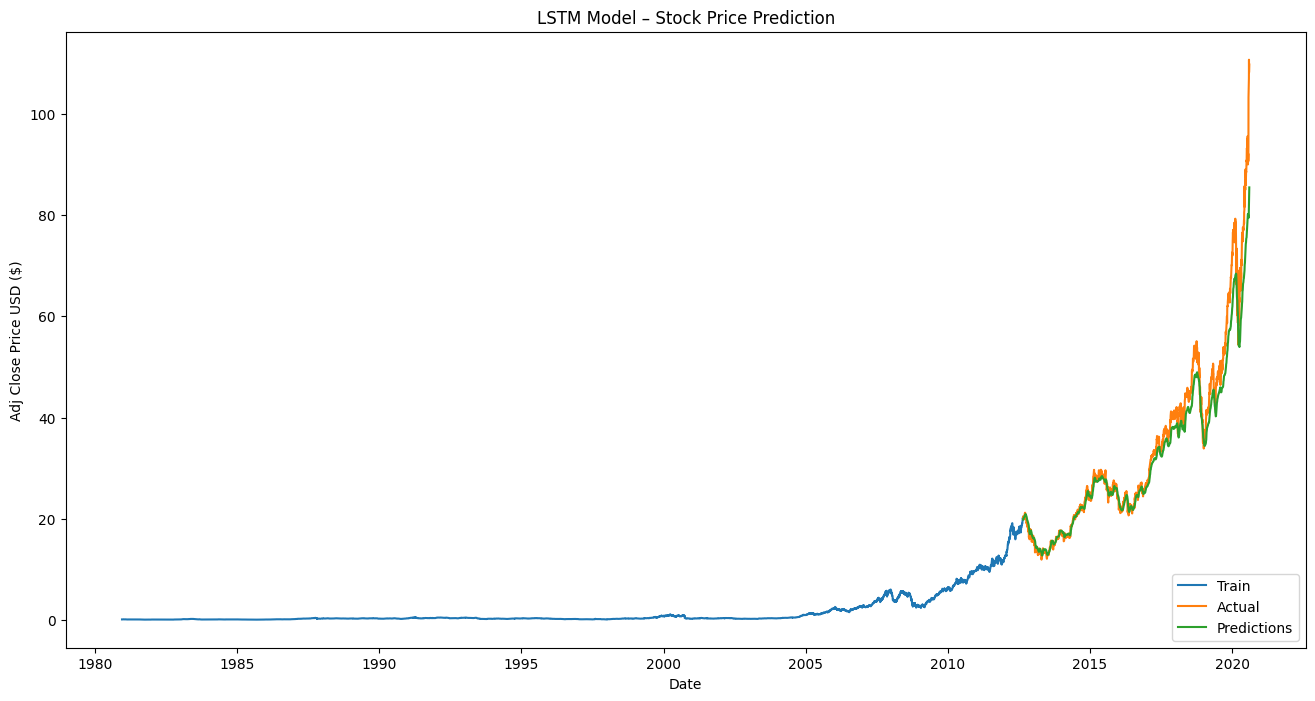

In [15]:
# Plot actual vs predicted
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model – Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()